# Chapter 14: Least Squares

- content: pp. 395 - 414
- exercises: pp. 415 - 419

In [1]:
# import commonly used Python libraries
import numpy as np
from matplotlib import pyplot as plt

## 14.1 Introduction

- The physical and biological world we inhabit is really, really, *really* complicated.
- How do we make sense of the complexity?
- We make simplified models of the most important aspects of the system under investigation, while ignoring or abstracting away the aspects that are less relevant.
- This process leads to a *model*, which is a set of equations that allows scientists to isolate and understand the principles of the system under investigation.
- Thus, the goal of building models is not to replicate *exactly* the system under investigation, but instead to identify a simplified and low-dimensional representation that can be understood by humans or simulated by computers.
- On the other hand, models should be sufficiently generic that they can be applied to different datasets.  This means that the models must be flexible enough that they can be adjusted to different datasets without having to create a brand new model for each particular dataset.
- This is why models contain both *fixed features* and *free parameters*.
  - The fixed features are components of the model that the scientist imposes, based on scientific evidence, theories, and intuition.
  - Free parameters are varaibles that can be adjusted to allow the model to fit any particular dataset.
- This brings us to the primary goal of model-fitting: find values for these free parameters that make the model match the data as closely as possible.

### Example:

- let's say we wanted to predict someone's height.
- Your hypotehsis is that height is a function of 3 features:
  - sex (male/female)
  - parents height
  - childhood nutrition (1-10 scale)
- *obviously what determines height is much more complicated than this but we are trying to simplify and capture the key factors*

we can now construct our model for height:
$$h = \beta_1s + \beta_2p + \beta_3n + \epsilon$$

Fixed Features:
- $h$ = height
- $s$ = sex
- $p$ = parents' height
- $n$ = childhood nutrition score
- $\epsilon$ = an "error term" / "residual" that captures all the variance in height that the 3 variables don't explain

Free Parameters:
- $\beta$ scalars for each of the factors
- they are also often called "weights" because the larger the scalar, the more influence the fixed feature has on the outcome.


- This leads to the question of how you find the model parameters that make the model match the data as closely as possible.
- Random guessing is a terrible idea
- We need an algorithm that will find the best parameters given the data
- The most commonly used algorithm for fitting models to data is **linear least-squares**, which we will learn in this chapter.

## 14.2 The five steps of model-fitting

### Step 1. Determine an equation or set of equations that comprise your model.
- In practice, you would often use existing equations or slight modifications of existing equations. 


### Step 2. Work the data into the model.
- You get existing data from a database or by collecting data in a scientific experiment, or you can simulate your own data.
- Each row of the dataset will be 1 equation.
- Combining all equations together results in a system of equations.


### Step 3. Convert the system of equations into a single matrix-vector equation
- This is exactly the same concept learned previously: split up the coefficients, variables and constants, and put them into matrices and vectors.
- In previous chapters, we would have called this $Ax=b$, but statistics lingo is slightly different.
- Here, it is called $X\beta = y$
  - $X$ = matrix of coefficients
  - $\beta$ = the vector of the unknown free parameters that we want to solve for
  - $y$ = the vector of constants we are predicting (in the example, this would be height)

### Step 4. Fit the model and solve for $\beta$
- which is also called:
  - fitting the model
  - estimating the parameters
  - computing the best-fit parameters
  - some other related terminology
- the rest of the chapter is focused on step 4

### Step 5. Statistically evaluate the model
- examples of questions to ask:
  - is it a good model?
  - how well does it fit the data?
  - does it generalize to new data or have we over-fit our sample data?
  - do all model terms contribute or should some be excluded?
- This step is all about inferential statistics, and it produces things like p-values and t-values and F-values.
- Step 5 is important for statistical applications, but is outside the scope of this book, and thus won't be covered in this chapter.

## 14.3 Terminology

- it's unfortunate and needlessly confusing that statistiians and linear algebrists use different terminology for the same concepts.
- the info below shows the terminology translation that will be used in this chapter

| LinAlg | Stats | Description                                                             |
|--------|-------|-------------------------------------------------------------------------|
| $Ax=b$ | $X\beta=y$| General linear model (GLM)                                              |
| $A$    | $X$     | Design matrix (columns = independent variables, predictors, regressors) |
| $x$    | $\beta$ | Regression coefficients or beta parameters                              |
| $b$    | $y$     | Dependent variable, outcome measure, data                               |

### "Linear" aspect of linear least squares

- final point is about the term "linear" in linear least squares:
- linear refers to the way that the parameters aer estimated; it is not a restriction on the model (the model may contain nonlinear terms and interactions).
- the restriction for linearity is that the coefficients (the free parameters) scalar-multiply their variables and sum to predict the dependent variable.
- basically taht just meanst hat it's possible to transform the system of equtions into a matrix equation.
- that restritcion allows us to use linear algebra methods to solve for $\beta$
- there are also nonlinear methods for estimateing parameters in nonlinear models

Example: the following equation contains 2 nonlinearities:
$$h = \beta_1s + \beta_2 \sqrt{\beta_3}p + \beta_3 n^3 + \epsilon$$
- one nonlinearity is in the regressors ($\beta_2 \sqrt{\beta_3}$)
  - this one prevents linear least-squares from fitting this model
  - (but there are nonlinear alternatives that can be learned about in a statistics course)
- the other is in a predictor ($n^3$)
  - this one is no problem

## 14.4 Least-squares via left inverse

- While there is only 1 solution to the general linear model equation, we can take multiple different paths/perspectives to reach that same solution.
  - algebra (section 14.4)
  - geometry (section 14.5)
  - row-rection (section 14.6)

- Problem is simple:
  - solve for $\beta$ in $X\beta = y$
- if $X$ were a square matrix, we could get the solution by pre-multiplying both sides by $X^{-1}$
- however, design matrices are tpically tall matrices, because there are far more observations/records than there are variables/features.
  - (nearly all statistical applications involve tall design matries)
- So now we know what the solution is:
  - instead of the full inverse, we use the left-inverse.
  - (see 12.6 - Left inverse for tall matrices)

$$X\beta = y$$
$$X^{-L}X\beta = X^{-L}y$$
$$(X^TX)^{-1}X^T X \beta = (X^TX)^{-1}X^T y$$
$$\beta = (X^TX)^{-1}X^T y$$

### Requirements for the above equation:
  - $X$ must be full column-rank (which means the design matrix contains a linearly independent set of predictor variables)
- if the design matrix has repeated columns, or if one predictor variable can be obtained from a linear combination of other predictor variables, then $X$ will be rank-deficient and the solution is not valid.
- in statistics lingo, this situation is called "multicollinearity"

### When is the solution exact?

- essentially what we are asking is if vector $y$ is in column space of matrix $X$
  - they're both in $\mathbb{R}^M$ because they both have M elements in the columns (i.e. they both have M rows), so that means its a valid question to ask.
  - but $y$ has M elements and $X$ has N columns, where N << M (e.g. M = 1000 vs N = 3)
- in this example, we are asking whether a specific vector is inside a 3D subspace embedded in ambient $\mathbb{R^1000}$
- the answer is almost always: No, $y \notin C(X)$
- even for a good model, a tiny bit of noise/variance would push vector $y$ out of column space $X$.
- What to do?

- The solution is to think about a slightly different question:
  - is there a $\hat{y}$ such that $\hat{y}$ really is in the column space of $X$?
  - then we would call the parameters $\hat{\beta}$
- obviously some versino of $\hat{y}$ and $\hat{\beta}$ exist, so we want to find the $\hat{y}$ that comes closest to $y$ as possible.
- $\hat{y}$ could be considered our "prediction" vector

This brings us to the full formulation of the general linear model and related equations:
$$\hat{y} = X \hat{\beta} y  \;\;\;\;\; = X \beta + \epsilon$$
$$\hat{y} = y + \epsilon$$

- $\epsilon$ is the residual (the difference between your predicted $y$ and actual $y$)
- the better your model fits the data, the closer $y$ is to the column space of $X$, and the smaller $\epsilon$ will be.
- keep in mind that $\epsilon$ is not in the data that is measured, and it is not in the model that you specify.  It is the difference between your approximated model & predictions vs the actual data.

## 14.5 Least-squares via orthogonal projection

- Imagine an ambient $\mathbb{R}^M$ space, and a subspace inside that ambient space whose basis vectors are the columns of the design matrix.
  - see figure 14.1 on p. 404 for an example in 2D subspace)
- The meausured data in $y$ forms a vector in $\mathbb{R}^M$.
- as mentioned in ch 13, it's sometimes easier to conceptualize $y$ as a coordinate in space rather than a vector from the origin.
- when working with real data, it's incredibly unlikely that $y$ is exactly in the column space of $X$
  - if you do have an exact fit, then the model is likely too complicated, or the thing you are trying to model is too simple.
- But the column space *is* important because that is the mathematical representation of our theory of the world.
- So from a geometric perspective, what is the coordinate that is as close asa possible to the data vector while still being in the subspace?
  - as we learned from Ch 13, the closest point is found on the orthogonal projection of the vector onto the subspace.
- That orthogonal projection is vector $\epsilon = y - X\beta$, which is orthogonal to the column space of $X$.

$$X^T \epsilon = 0$$
$$X^T (y - X \beta) = 0$$
$$X^Ty - X^TX \beta = 0$$
$$X^TX \beta = X^Ty$$
$$\beta = (X^TX)^{-1} X^Ty$$

- And amazingly (though not surprisingly), we've arrived at the same solution as in the previous section!
- We also see that the design matrix $X$ and the residuals vector $\epsilon$ are orthogonal.
- Geometrically that makes sense; statistically, it means that the prediction errors should be unrelated to the model, which is an important quality check of the model performance.

### Reflection
- the author's been a bit loose with plus and minus signs.
- for example, why is $\epsilon$ defined as $y - X\beta$ and not $X\beta - y$?
- sign invariance often rears its confusing head in linear algebra, and in many cases, it turns out that when the sign seems like it's arbitrary, then the solution ends up being the same regardless.
- Also, in many cases, there are coefficients floating around that can absorb the signs.
- e.g. you could flip the signs of all the *elements* in $\epsilon$ to turn vector $-\epsilon$ into $+\epsilon$.

## 14.6 Least squares via row-reduction

- Now we're going to derive the least-squares formula again, this time using row-reduction and Gauss-Jordan elimination.
- though it may seem redundant, this section will help link concepts across different chapters of the book, and therefore has high conceptual / educational value.
- Methodology:
  - recall from Ch 10 that we can solve a system of equations by performing row-reduction on a matrix of coefficients agumented by the constants.
  - then in ch 12, we saw how to apply that method in computing the matrix inverse.
  - let's apply that same concept here to solve for $\beta$ in our statistical model

$$rref([X | y]) \Rightarrow [I | \beta]$$
- translation: calculating the RREF on matrix $X$ augmented by vector $y$ will give us the Identity matrix, augmented by $\beta$
- *note: this equation does not work - details explained below and a better version is derived*

- let's think through the equation above to see if any problems come up...
  - $[X | y]$ is valid because they have the same number of rows
  - row reduction is also valid
  - but $[X | y]$ will have N + 1 columns and a rank of N + 1 < M.
  - thus, instead of $[I | \beta]$, the actual outcome will be $\begin{bmatrix}I \\ 0 \end{bmatrix}$
  - in other words, a tall matrix with the identity matrix $I_N$ on top and all zeros underneath.

- now that we've identified the problem, we need to rethink our approach
- the solution comes from pre-multiplying the general linear model equation by $X^T$:
$$X^T X \beta = X^T y$$
- this is often called the "normal equation".

- Now we can go back to Gauss-Jordan and get a sensible result:
$$rref([X^T X | X^T y]) \Rightarrow [I | \beta]$$

- let's think about the sizes.
  - $X^TX$ will be N x N (feature count x feature count), and thus the augmented matrix will be of size N x ( N + 1)
  - in other words, a wide, full row-rank matrix.
  - this will give us our desired $\beta$ on the right.
- for more details about why this works, see detailed explanation on p. 406-407

## 14.7 Model-predicted values and residuals

- we know from earlier that $\epsilon$ is orthogonal to $X$
- statistically, $\epsilon$ is the residual variance in the data that the model cannot account for
- we can also write this as follows:
$$\epsilon = X \beta - y$$
- when is the model a good fit to the data?
- the smaller the $\epsilon$ value, the better the model fits the data
- in fact, we don't care about the exact values comprising $\epsilon$, we just care about the norm of $\epsilon$:
$$||\epsilon||^2 = ||X \beta - y||^2$$

- now, we can reframe the goal of model-fitting in a slightly different way:
  - find the values in vector $\beta$ that minimize both sides of the above equation
  - this is a standard optimization problem and can be expressed as:
$$min \beta \; ||X \beta - y||^2$$

- the solution to this problem is obtained by computing the derivative and setting that equal to zero:
$$0 = \frac{d}{d \beta} ||X \beta - y||^2 = 2X^t (X \beta - y)$$
$$0 = X^TX \beta - X^T y$$
$$X^TX \beta = X^T y$$
$$\beta = (X^TX)^{-1}X^T y$$
- and here we are, back at the same solution to the least-squares that we obtained previously!
  - (only using a bit of calculus and optimization this time)

## 14.8 Least-squares example

- doing statistics in the real-world is usually not so simple as just following the above steps.
- in practice, statisticians will often begin with simple models and then add complexity to the models as it becomes clear that the simple models are niappropriately suited for the data, and according to the available theoretical frameworks.
- Here's an example to get a taste of the process...

- We begin with a set of numbers in a dataset called $D$.
- We assume the order is meaningful, perhaps these are values recorded from a signal made sequentially in time.
$$D = {-4, 0, -3, 1, 2, 8, 5, 8}$$

### Step 1: Determine an equation or set of equations that comprise your model.
- we start by assuming that the signal has a constant value
  - (i.e. our hypothesis at this point is that there is only 1 meangful signal value, and the divergences at each time point are errors / signal noise)
- thus, the model is:
$$d = \beta 1 + \epsilon$$

### Step 2: Work the data into the model
- doing this gives us a series of equations that looks like...
$$
\begin{Bmatrix}
-4 = \beta 1 \\
0 = \beta 1 \\
-3 = \beta 1 \\
... \\
8 = \beta 1
\end{Bmatrix}
$$

### Step 3: Convert the system of equations into a single matrix-vector equation
$$
\begin{bmatrix}
1 \\
1 \\
1 \\
... \\
1
\end{bmatrix}
[\beta]
=
\begin{bmatrix}
-4 \\
0 \\
-3 \\
... \\
8
\end{bmatrix}
$$

### Step 4: Fit the model and solve for $\beta$
$$\beta = (X^TX)^{-1}X^Ty$$
$$\beta = 8^-1 x 17$$
$$\beta = \frac{17}{8} = 2.125$$

### Step 5: Statistically evaluate the model
- *note that formal statistical evaluation is skipped in this example, we'll do informal evaluation instead*

- an interesting thing happened here...
- we ended up summing all the data points (dot product between the numbers and a vector of 1's) and dividing by the number of elements.  That's literally the arithmetic mean!
- so we re-derived the average from a statistics / linear algebra perspective, where our model is that the data are meaningful characterized by a single number.

- Compare predictions to actual and evaluate the errors
  - for a visual of the output and error comparison, see figure 14.2 on page 411.
  - the model looks pretty awful, to be honest...
  - the data clearly shows an upward trend which the model cannot capture.
- let's try changing the model...

### Model # 2:
- instead of predicting a single data value, let's predict that the data values change over the x-axis (i.e. linear trend)
- the new model equation in step 3 would look like this:
$$
\begin{bmatrix}
1 \\
2 \\
3 \\
... \\
8
\end{bmatrix}
[\beta]
=
\begin{bmatrix}
-4 \\
0 \\
-3 \\
... \\
8
\end{bmatrix}
$$

- let's see what the parameter $\beta$ is
  - *note that we are no longer predicting the average value, we are now predicting a slope*
$$\beta = (X^TX)^{-1}X^T y$$
$$\beta = 204^{-1} x 148$$
$$\beta = \frac{204}{148} = .7255$$

- evaluating the new model:
  - see figure 14.3 on p. 412 for a new comparison of predicted vs actual
  - it looks better, but still not quote right
  - the predicted data are too high (over-estimated) in the beginning and too low (under-estimated) in the end
  - the problem here is that the model lacks an *intercept term*
  - the intercept is the expected value when all other parameters are set to 0
    - recall the old $y = mx + b$ formula for a line, where b = the y-intercept

### Model # 3:
- now let's expand the model to include an intercept term, which involves including an extra column of 1's in the design matrix
- we'll also need two $\beta$s instead of one
$$
\begin{bmatrix}
1 & 1 \\
1 & 2 \\
1 & 3 \\
... \\
1 & 8
\end{bmatrix}
[\beta_1]
[\beta_2]
=
\begin{bmatrix}
-4 \\
0 \\
-3 \\
... \\
8
\end{bmatrix}
$$

- the arithmetic gets a bit more involved, but produces the following:
$$\beta = (X^TX)^{-1}X^T y$$
$$\beta = \begin{bmatrix}8 & 36 \\ 36 & 204 \end{bmatrix}^{-1} \begin{bmatrix} 17 \\ 148 \end{bmatrix}$$
$$\beta = \begin{bmatrix} -5.5357 \\ 1.7024  \end{bmatrix}$$

- evaluating the results of the 3rd model:
  - looking at figure 14.4 (page 414), we can see that this model fits the data reasonably well.
  - there are still some residuals that the model doesn't capture, but they could be random fluctuations.
  - notice that the line of best fit doesn't go through the origin anymore.  This is because we added a y-intercept, which turned out to be -5.5357.

- the final thing we want to do is confirm that $\epsilon \perp X \beta$
- the two columns below show the residual and predicted values, truncated at 4 digits:
$$
\begin{matrix}
\epsilon  & X \beta \\
0.1667 & -3.8333 \\
-2.1310 & -2.1310 \\
2.5714 & -0.4286 \\
... & ... \\
0.0833 & 8.0833
\end{matrix}
$$

$$\epsilon^T(X\beta) = 0.000000000000142$$
- it may seem like the dot product is not exactly zero, but it is tiny enough to be considered zero plus computer rounding error.

## Code

In [2]:
# calculate least squares in Python (note, this was mistakenly put in ch. 13)
A = [[1,2],[3,1],[1,1]]
b = [5.5, -3.5, 1.5]
np.linalg.lstsq(A,b, rcond=None)[0]   # note: a "FutureWarning popped up recommending to add `rcond=None`"

array([-2.5,  4. ])

## 14.9 - 14.10 Code Challenges

Imagine you work as a data scientist in a company that sells widgets online.  The company gives you a dataset of information from 1000 sales, which includes the time of the sale (listed in hours of the day using a 24 hour clock, e.g. 15 = 3pm), the age of the buyer (in years), and the number of widges sold.  The data are available at sincxpress.com/widget_data.txt.
(note: these data are made up for this exercise)

In [3]:
# load the data for the code challenge from the website
# (note - the data is also stored in the `data/14`` subfolder in case the link doesn't work)
import pandas as pd
data = pd.read_csv("https://sincxpress.com/widget_data.txt", header=None)
data.columns = ["Hour", "Age", "Qty"]
data

,Hour,Age,Qty
0,10,32.614,10
1,15,34.890,14
2,17,34.652,20
3,15,27.755,17
4,13,40.604,14
...,...,...,...
995,14,37.124,16
996,14,25.962,19
997,17,33.047,25
998,9,39.386,12


**1. Explain and write down a mathematical model that is appropriate for this dataset.**

- since it wasn't explicitly stated what we are trying to predict, I will assume that we are trying to predict the quantity of units sold.
- that means that our independent variables are:
  - Hour (time of sale)
  - Age
- so with that info, we can start with a simple equation:
$$y = X\beta + \epsilon$$
- expanded out to include the y-intercept and 2 features:
$$y = \beta_0 + \beta_1(Hour) + \beta_2(Age) + \epsilon$$

**2. Write the matrix equation corresponding to the model, and describe the columns in the design matrix**

$$y = X\beta + \epsilon$$
- y is a vector
- X is a matrix with 3 columns
  - Intercept (all ones)
  - Hour (aka time of sale)
  - Age
- beta is a vector with 3 elements, corresponding to the 2 columns of X
- $\epsilon$ is a vector that will contain any residual not explained by the model, reconciling it to $y$

**3. Compute the model coefficients using the least-squares algorithm in MATLAB or Python.  You can also divide the $\beta$ coefficients by the standard deviations of the corresponding independent variables, which puts the various model terms in the same scale and therefore more comparable.**

In [4]:
X = data.iloc[:, 0:2]
X.insert(0, "Intercept", 1)
X.head()

,Intercept,Hour,Age
0,1,10,32.614
1,1,15,34.890
2,1,17,34.652
3,1,15,27.755
4,1,13,40.604


In [5]:
y = data.iloc[:, 2:3]
y.head()

,Qty
0,10
1,14
2,20
3,17
4,14


In [6]:
X_T = X.T
X_T.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
Intercept,1.000,1.00,1.000,1.000,1.000,1.00,1.000,1.000,1.000,1.000,...,1.000,1.00,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.00
Hour,10.000,15.00,17.000,15.000,13.000,10.00,15.000,13.000,13.000,13.000,...,13.000,14.00,16.000,15.000,16.000,14.000,14.000,17.000,9.000,13.00
Age,32.614,34.89,34.652,27.755,40.604,43.29,35.673,37.358,30.958,32.542,...,27.477,33.15,35.937,30.695,41.187,37.124,25.962,33.047,39.386,34.73


In [7]:
B = np.linalg.inv(X_T @ X) @ X_T @ y
B.index = X.columns   # label the index 0 = Intercept, 1 = Hour, 2 = Age
B

,Qty
Intercept,10.398267
Hour,0.846948
Age,-0.180105


In [8]:
predictions = X @ B
predictions.head()   # predictions was called y-hat in the chapter text

,Qty
0,12.993793
1,16.818614
2,18.555375
3,18.103665
4,14.095596


**4. Produce scatter plots that visualize the relationship between the independent and dependent variables**

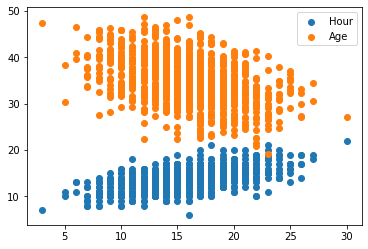

In [9]:
plt.scatter(y, X["Hour"], label="Hour")
plt.scatter(y, X["Age"], label="Age")
plt.legend(loc="upper right")

**5. Compute $R^2$ for the model to see how well it fits the data.  Are you surprised, based on what you see in the scatterplots?**

One measure of how well the model fits the data is called $R^2$ ('R-squared'), and can be interpreted as the proportion of variance in the dependent variable that is explained by the design matrix.  Thus, an $R^2$ of 1 indicates a perfect fit between the model.  The definition of $R^2$ is:
$$R^2 = 1 - \frac{\sum_i \epsilon^2_i}{\sum_i (y_i - \bar{y})^2}$$
($\epsilon_i$ is the error (residual) at each data point that was introduced earlier, and $\bar{y}$ is the average of all elements in $y$.)

In [10]:
R2 = 1 - ((predictions - y) ** 2).sum() / ((y - y.mean()) ** 2).sum()
R2

Qty    0.36639
dtype: float64

note - another way to describe $R^2$ (from the DataQuest Linear Regression video) is
$$R^2 = 1 - (SSR / SST)$$
- SSR is the sum of squared residuals (how far off our predictions were)
- SST is the sum squared total (how different each element is from the mean, i.e. how much variance in the data)
- so in other words, $R^2$ shows the relationship between the prediction errors and variation in the data
  - the higher $R^2$ (the closer it is to 1), the better the fitting the data / predicting the outcomes.

In [11]:
SSR = ((y - predictions) ** 2).sum()  # sum of squared residuals
SSR

Qty    10318.38473
dtype: float64

In [12]:
SST = ((y - y.mean()) ** 2).sum()
SST

Qty    16285.071
dtype: float64

In [13]:
R2 = 1 - SSR/SST
R2

Qty    0.36639
dtype: float64